In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
from sklearn.utils import resample

# Chapter 1: Data Load

In [57]:
df_train = pd.read_csv('Data/aug_train.csv')
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


# Chapter 2:  EDA

In [58]:
df_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [59]:
print(f'The number of rows: {len(df_train.axes[0])}')

The number of rows: 19158


In [60]:
print(f'The number of columns: {len(df_train.axes[1])}')

The number of columns: 14


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [62]:
nulls_summary = pd.DataFrame(df_train.isnull().any(), columns=['Nulls'])
nulls_summary['Num_of_nulls [qty]'] = pd.DataFrame(df_train.isnull().sum())
nulls_summary['Num_of_nulls [%]'] = round((df_train.isnull().mean()*100),2)
nulls_summary

,Nulls,Num_of_nulls [qty],Num_of_nulls [%]
enrollee_id,False,0,0.00
city,False,0,0.00
city_development_index,False,0,0.00
gender,True,4508,23.53
relevent_experience,False,0,0.00
enrolled_university,True,386,2.01
education_level,True,460,2.40
major_discipline,True,2813,14.68
experience,True,65,0.34
company_size,True,5938,30.99


In [63]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [64]:
df_train.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


### Correlation between numerical variables

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.

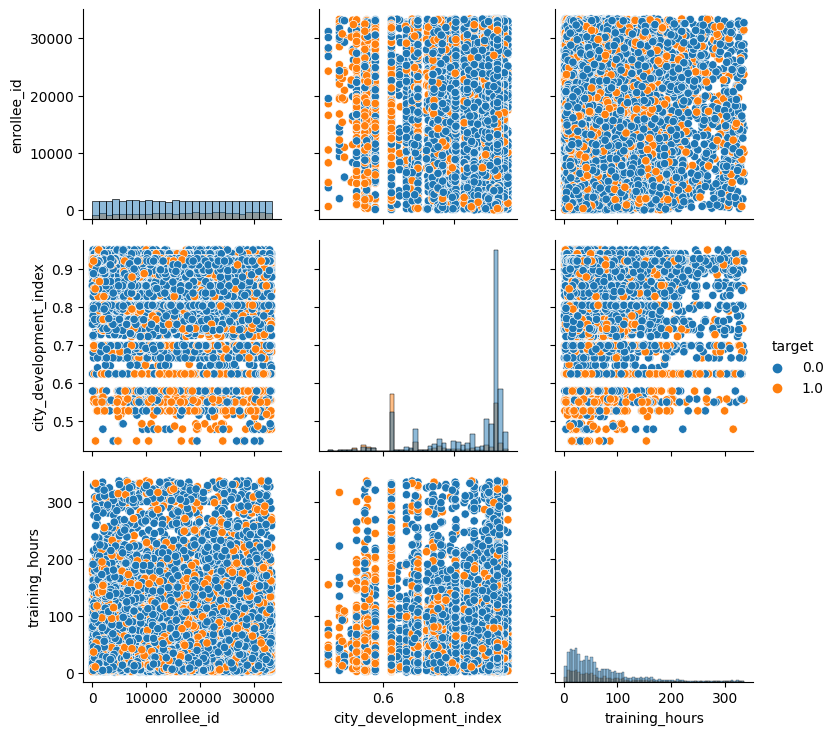

In [65]:
g = sns.PairGrid(df_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']], hue = 'target')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

[Text(0.5, 1.0, 'Heatmap - the Pearson correlation coefficient')]

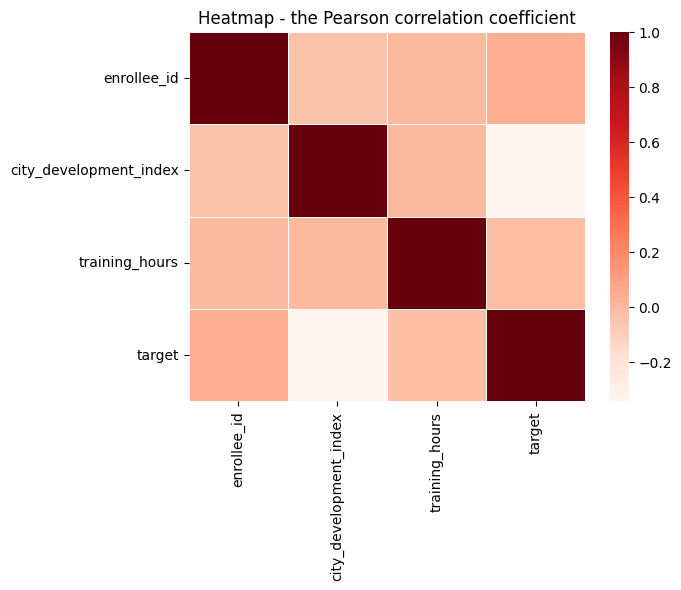

In [66]:
sns.heatmap(df_train[['enrollee_id', 'city_development_index', 'training_hours', 'target']].corr(), cmap="Reds", linewidths=.5)\
.set(title="Heatmap - the Pearson correlation coefficient")

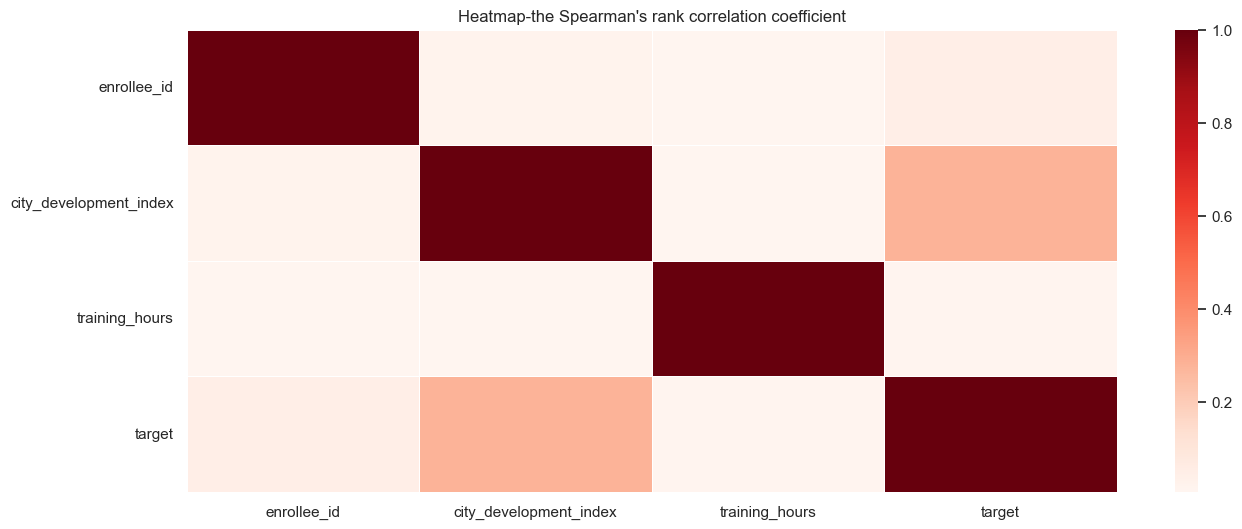

In [67]:
import scipy
corr_num = pd.DataFrame(scipy.stats.spearmanr(df_train.select_dtypes(include = ['float', 'int']))[0],
                        columns = df_train.select_dtypes(include = ['float', 'int']).columns,
                        index = df_train.select_dtypes(include = ['float', 'int']).columns)

plt.figure(figsize=(15,6))
sns.set(font_scale=1)
sns.heatmap(corr_num.abs(), cmap="Reds", linewidths=.5).set(title="Heatmap-the Spearman's rank correlation coefficient")
plt.show()

### Correlation between numerical and categorical variables

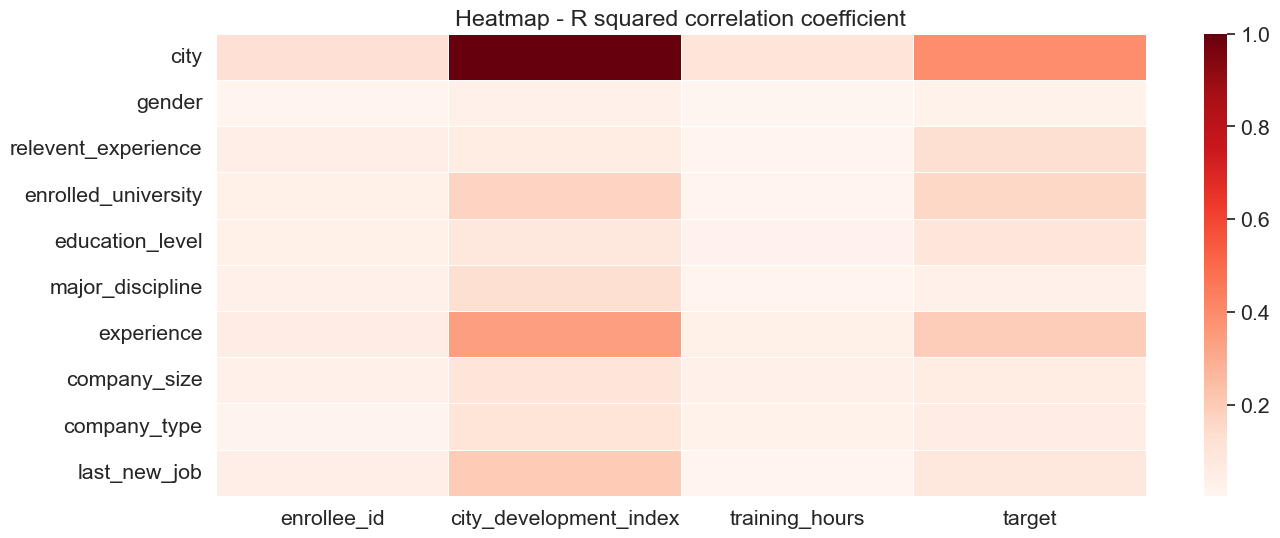

In [68]:
import statsmodels.formula.api as sm
cat_cols = ['city', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']
num_cols = df_train.drop(cat_cols, axis = 1).columns


cols = []
for cat in cat_cols:
    rows = []
    for num in num_cols:
        formula = num + '~' +cat
        model = sm.ols(formula=formula,data=df_train)
        rows.append(np.sqrt(model.fit().rsquared))
    cols.append(rows)
corr_num_cat = pd.DataFrame(cols, index = cat_cols, columns = num_cols)

# wykres zależności
plt.figure(figsize=(15,6))
sns.set(font_scale=1.4)
sns.heatmap(corr_num_cat, cmap="Reds", linewidths=.5).set(title='Heatmap - R squared correlation coefficient')
plt.show()

### Correlation between categorical variables

In [69]:
def CramersV(tab):
    a = scipy.stats.chi2_contingency(tab)[0]/sum(tab.sum())
    b = min(tab.shape[0]-1, tab.shape[1]-1,)
    return(np.sqrt(a/b))

def CalculateCrammersV(tab):
    ret = []
    for m in tab:
        row = []
        for n in tab:
            cross_tab = pd.crosstab(tab[m].values,tab[n].values)
            row.append(CramersV(cross_tab))
        ret.append(row)
    return pd.DataFrame(ret, columns=tab.columns, index=tab.columns)

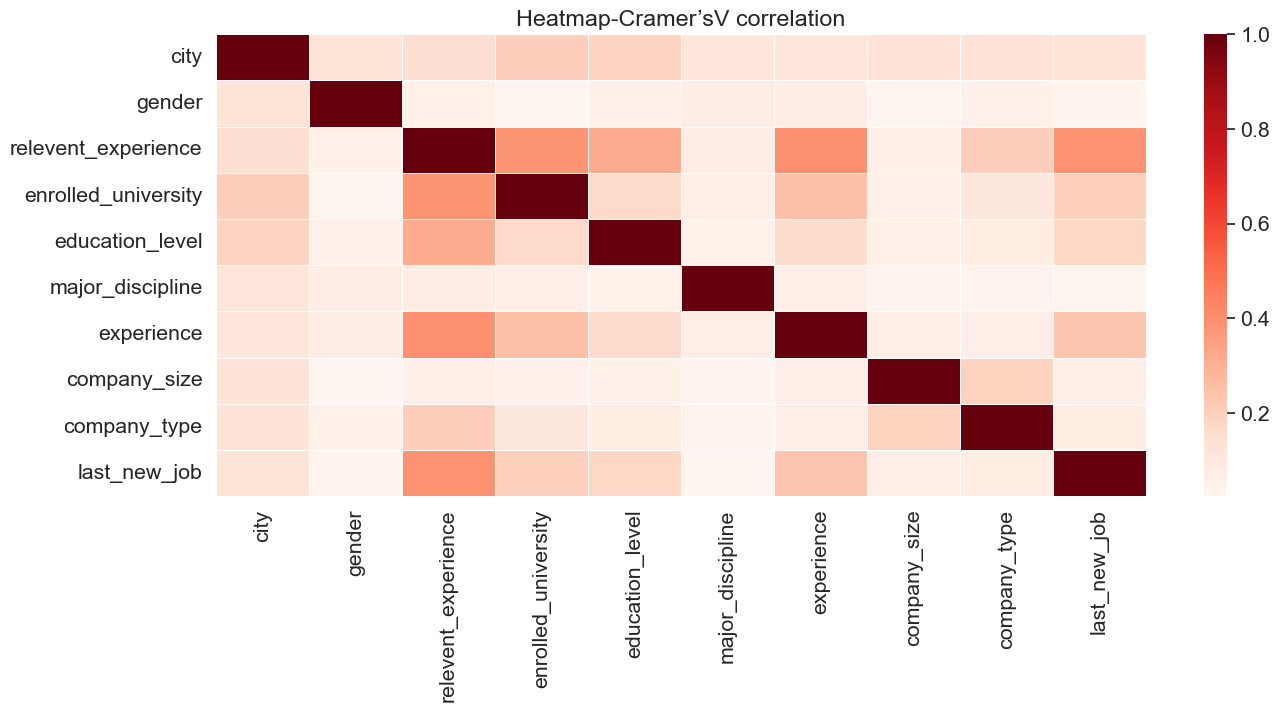

In [70]:
crammer = CalculateCrammersV(df_train[cat_cols])

plt.figure(figsize=(15,6))
sns.set(font_scale=1.4)
sns.heatmap(crammer, cmap="Reds", linewidths=.5).set(title='Heatmap-Cramer’sV correlation')
plt.show()

# Chapter 3:  Features transformation

### 1. enrollee_id
- Unique ID for enrollee, it is typicaly random number gien to employee which is meaningless about the characteristic of person
- It leads to the conlusion that it can have negative impoact on model, so best practive is drop variable

In [72]:
df_train['enrollee_id'].nunique()

19158

In [73]:
df_train[df_train.duplicated(subset=['enrollee_id'])]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target


### 2&3. city &  city_development_index
- city: City code
- citydevelopmentindex: Developement index of the city (scaled)
- the varibales seems to be duplicated, we remove one of them

In [74]:
df_train[(df_train["city"]=="city_103")][['city', 'city_development_index']]

,city,city_development_index
0,city_103,0.92
8,city_103,0.92
9,city_103,0.92
11,city_103,0.92
16,city_103,0.92
...,...,...
19146,city_103,0.92
19149,city_103,0.92
19152,city_103,0.92
19154,city_103,0.92


In [75]:
df_compare = df_train.groupby('city')['city_development_index'].agg(['min', 'max'])
df_compare_result = df_compare[(df_compare['min'] != df_compare['max'])]
df_compare_result

,min,max
city,,


### 4. gender
- Gender of enrolee
- There is 3 Ccategories of gender, Male, Female and Other
- Cleanining data by full filling missing values with Other and using metod get dummies

In [76]:
df_train['gender'].value_counts()

gender
Male      13221
Female     1238
Other       191
Name: count, dtype: int64

### 5. relevent_experience
- Relevent experience of enrolee
- No missing values, so cleaning data by mapping 'Has relevent experience': 1, 'No relevent experience': 0

In [77]:
df_train['relevent_experience'].value_counts()

relevent_experience
Has relevent experience    13792
No relevent experience      5366
Name: count, dtype: int64

### 6. enrolled_university
- Type of University course enrolled if any
- Cleanining data by full filling missing values with 'no_enrollment' and using mapping
'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2

In [78]:
df_train['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

### 7. education_level
- Education level of enrolee
- Cleanining data by full filling missing values with 'other' and using mapping 'Graduate':3, 'Masters':4, 'High School':2, 'Other':0, 'Phd':5, 'Primary School':1

In [79]:
df_train['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

### 8. major_discipline
- Education major discipline of enrolee
-- Cleanining data by full filling missing values with 'Missing' and using metod get dummies

In [80]:
df_train['major_discipline'].value_counts()

major_discipline
STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: count, dtype: int64

### 9. experience
- Enrolee total experience in years
- cleaning all chars which are not numbers, full filling missing as '0' and changing variables into float type

In [81]:
df_train['experience'].value_counts()

experience
>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: count, dtype: int64

### 10. company_size
- No of employees in current employer's company
- - Cleanining data by full filling missing values with 'other' and using mapping 'Other':0, '50-99':3, '<10':1, '10000+':8, '5000-9999':7, '1000-4999':6, '10/49':2,
       '100-500':4, '500-999':5

In [82]:
df_train['company_size'].value_counts()

company_size
50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

### 11.company_type
- Type of current employer
- Cleanining data by full filling missing values with 'Missing' and using metod get dummies

In [83]:
df_train['company_type'].value_counts()

company_type
Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: count, dtype: int64

### 12. last_new_job
- Difference in years between previous job and current job
- cleaning all chars which are not numbers, full filling missing as '0' and changing variables into float type

In [84]:
df_train['last_new_job'].value_counts()

last_new_job
1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: count, dtype: int64

### 13. training_hours
- training hours completed
- no need for cleaning

In [85]:
df_train['training_hours'].value_counts()

training_hours
28     329
12     292
18     291
22     282
50     279
      ... 
266      6
234      5
272      5
286      5
238      4
Name: count, Length: 241, dtype: int64

### 14. target:
 - 0 – Not looking for job change, 
 - 1 – Looking for a job change
 - The target variable is not distributed równomiernie, so we use resampling to increase the smaller class

<Axes: xlabel='target', ylabel='count'>

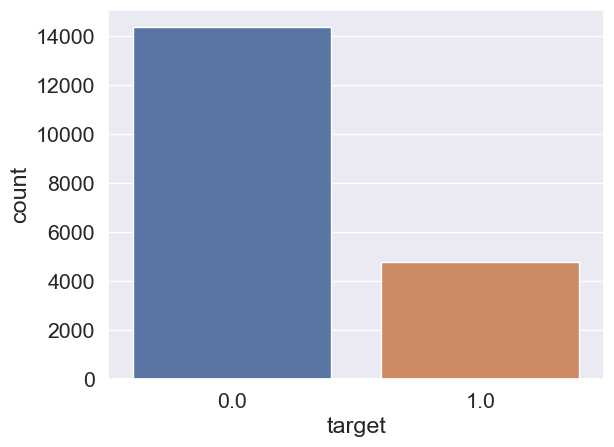

In [86]:
sns.countplot(data=df_train, x = 'target')

In [87]:
df_train['target'].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

In [93]:
# Final function for cleaning the dataframe based on previous researches:

def cleaning(df):
    df_copy = df.copy()
    
    df_copy = df_copy.drop(columns=['enrollee_id'])
    
    df_copy = df_copy.drop(columns=['city'])
    
    df_copy['gender'] = df_copy['gender'].fillna('Other')
    df_copy = pd.get_dummies(df_copy, columns=['gender'], drop_first=False, dtype=int)
    
    experience = {'Has relevent experience': 1, 'No relevent experience': 0}
    df_copy['relevent_experience']= df_copy['relevent_experience'].map(experience)
    
    df_copy['enrolled_university'] = df_copy['enrolled_university'].fillna('no_enrollment')
    enrolled_uni = {'no_enrollment': 0, 'Part time course': 1, 'Full time course': 2}
    df_copy['enrolled_university']= df_copy['enrolled_university'].map(enrolled_uni)
    
    df_copy['education_level'] = df_copy['education_level'].fillna('Other')
    education = {'Graduate':3, 'Masters':4, 'High School':2, 'Other':0, 'Phd':5, 'Primary School':1}
    df_copy['education_level']= df_copy['education_level'].map(education)
    
    df_copy['major_discipline'] = df_copy['major_discipline'].fillna('Missing')
    df_copy = pd.get_dummies(df_copy, columns=['major_discipline'], drop_first=False, dtype=int)
    
    df_copy['experience'] = df_copy['experience'].str.replace('>20', '21')
    df_copy['experience'] = df_copy['experience'].str.replace('<1', '0.5')
    df_copy['experience'] = df_copy['experience'].fillna(0).astype('float')
    
    df_copy['company_size'] = df_copy['company_size'].fillna('Other')
    size = {'Other':0, '50-99':3, '<10':1, '10000+':8, '5000-9999':7, '1000-4999':6, '10/49':2,
       '100-500':4, '500-999':5}
    df_copy['company_size']= df_copy['company_size'].map(size)
    
    df_copy['company_type'] = df_copy['company_type'].fillna('Missing')
    df_copy = pd.get_dummies(df_copy, columns=['company_type'], drop_first=False, dtype=int)
    
    
    df_copy['last_new_job'] = df_copy['last_new_job'].str.replace('>4', '5')
    df_copy['last_new_job'] = df_copy['last_new_job'].str.replace('never', '0')
    df_copy['last_new_job'] = df_copy['last_new_job'].astype('float')
    df_copy['last_new_job'] = df_copy['last_new_job'].fillna(df_copy['last_new_job'].mean())
    
    df_majority = df_copy[df_copy['target'] == 0]
    df_minority = df_copy[df_copy['target'] == 1]
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples=14381,    # to match majority class
                                 random_state=42) # reproducible results
 
    # Combine majority class with upsampled minority class
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled
    
    return df_upsampled
    
df_clean=cleaning(df_train)
df_clean

,city_development_index,relevent_experience,enrolled_university,education_level,experience,company_size,last_new_job,training_hours,target,gender_Female,...,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,company_type_Early Stage Startup,company_type_Funded Startup,company_type_Missing,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd
1,0.776,0,0,3,15.0,3,5.000000,47,0.0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.624,0,2,3,5.0,0,0.000000,83,0.0,0,...,0,0,1,0,0,1,0,0,0,0
4,0.767,1,0,4,21.0,3,4.000000,8,0.0,0,...,0,0,1,0,1,0,0,0,0,0
6,0.920,1,0,2,5.0,3,1.000000,24,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,0.920,1,0,3,17.0,8,5.000000,123,0.0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112,0.843,0,2,3,7.0,0,2.000427,28,1.0,0,...,0,0,1,0,0,0,0,0,1,0
15248,0.624,1,0,3,7.0,6,1.000000,38,1.0,0,...,0,0,1,0,0,0,0,0,0,1
987,0.624,0,2,2,6.0,0,0.000000,44,1.0,0,...,0,0,0,0,0,1,0,0,0,0
4199,0.624,1,0,3,2.0,2,1.000000,101,1.0,0,...,0,0,1,0,0,0,0,0,0,1


# Missing check

In [99]:
print("Any missing sample in training set:",df_clean.isnull().values.any())

Any missing sample in training set: False


# Standard Scaler

In [94]:
from sklearn.preprocessing import StandardScaler
y = df_clean['target']
X = df_clean.drop(columns=['target'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns=X.columns)
# data_scaled=X_scaled.drop(columns=['target'])
data_scaled = pd.concat([X_scaled, y], axis = 1)
# X_scaled = pd.concat([X_scaled, y], axis = 1)

In [98]:
print(f'df_clean: {df_clean.shape}, y: {y.shape}  , X: {X.shape},    X_scaled: {X_scaled.shape}, data_scaled: {data_scaled.shape}' )

df_clean: (28762, 26), y: (28762,)  , X: (28762, 25),    X_scaled: (28762, 25), data_scaled: (28762, 26)


# Chapter 4: Modeling

In [100]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

# xgb.XGBClassifier()

def first_scores(df):
    y = df['target']
    X = df.drop(columns=['target'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
    return X_train, X_test, y_train, y_test

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average, zero_division = 0)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total    

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')
        

def check_metrics(metrics, data):
    X_train, X_test, y_train, y_test = first_scores(data)
    for metric in metrics:
        model = metric()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print_results(calculate_metrics(y_test, y_pred), classifier_id=metric)

In [102]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test =first_scores(data_scaled)

models = {
    "RandomForest": RandomForestClassifier(),
    "Logistic": LogisticRegression(max_iter=1000),
    "SvC": SVC(kernel = 'rbf', C=0.1),
    "KNN": KNeighborsClassifier(n_neighbors=5, metric = 'manhattan'),
    "Bagging": BaggingClassifier(estimator = SVC(kernel = 'rbf', C=0.1), n_estimators = 5),
    "Decision Tree": DecisionTreeClassifier(),
    "XGB": xgb.XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "CatBoost": CatBoostClassifier()
}

results = []

for model in models.values():
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
   
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    
    results.append(cv_scores)

Learning rate set to 0.031226
0:	learn: 0.6840663	total: 174ms	remaining: 2m 54s
1:	learn: 0.6756847	total: 185ms	remaining: 1m 32s
2:	learn: 0.6679990	total: 195ms	remaining: 1m 4s
3:	learn: 0.6602344	total: 209ms	remaining: 52.1s
4:	learn: 0.6530003	total: 222ms	remaining: 44.1s
5:	learn: 0.6463835	total: 238ms	remaining: 39.5s
6:	learn: 0.6400842	total: 252ms	remaining: 35.8s
7:	learn: 0.6339616	total: 269ms	remaining: 33.3s
8:	learn: 0.6284583	total: 284ms	remaining: 31.3s
9:	learn: 0.6238477	total: 300ms	remaining: 29.7s
10:	learn: 0.6188232	total: 316ms	remaining: 28.4s
11:	learn: 0.6140532	total: 332ms	remaining: 27.3s
12:	learn: 0.6095902	total: 347ms	remaining: 26.4s
13:	learn: 0.6058796	total: 363ms	remaining: 25.6s
14:	learn: 0.6016705	total: 380ms	remaining: 24.9s
15:	learn: 0.5980455	total: 391ms	remaining: 24.1s
16:	learn: 0.5944534	total: 402ms	remaining: 23.3s
17:	learn: 0.5911450	total: 414ms	remaining: 22.6s
18:	learn: 0.5881271	total: 425ms	remaining: 22s
19:	learn: 

166:	learn: 0.5072008	total: 2.68s	remaining: 13.4s
167:	learn: 0.5071051	total: 2.69s	remaining: 13.3s
168:	learn: 0.5068891	total: 2.74s	remaining: 13.5s
169:	learn: 0.5067684	total: 2.76s	remaining: 13.5s
170:	learn: 0.5066779	total: 2.78s	remaining: 13.5s
171:	learn: 0.5064937	total: 2.79s	remaining: 13.4s
172:	learn: 0.5062583	total: 2.81s	remaining: 13.4s
173:	learn: 0.5060357	total: 2.83s	remaining: 13.4s
174:	learn: 0.5059055	total: 2.85s	remaining: 13.4s
175:	learn: 0.5057538	total: 2.86s	remaining: 13.4s
176:	learn: 0.5054622	total: 2.88s	remaining: 13.4s
177:	learn: 0.5052958	total: 2.89s	remaining: 13.4s
178:	learn: 0.5051536	total: 2.91s	remaining: 13.3s
179:	learn: 0.5050231	total: 2.92s	remaining: 13.3s
180:	learn: 0.5048149	total: 2.94s	remaining: 13.3s
181:	learn: 0.5046427	total: 2.96s	remaining: 13.3s
182:	learn: 0.5044177	total: 2.98s	remaining: 13.3s
183:	learn: 0.5043197	total: 2.99s	remaining: 13.3s
184:	learn: 0.5041068	total: 3.01s	remaining: 13.3s
185:	learn: 

330:	learn: 0.4809183	total: 5.36s	remaining: 10.8s
331:	learn: 0.4808568	total: 5.37s	remaining: 10.8s
332:	learn: 0.4807718	total: 5.39s	remaining: 10.8s
333:	learn: 0.4806262	total: 5.4s	remaining: 10.8s
334:	learn: 0.4805450	total: 5.42s	remaining: 10.8s
335:	learn: 0.4804573	total: 5.43s	remaining: 10.7s
336:	learn: 0.4803597	total: 5.45s	remaining: 10.7s
337:	learn: 0.4801188	total: 5.46s	remaining: 10.7s
338:	learn: 0.4800519	total: 5.48s	remaining: 10.7s
339:	learn: 0.4799465	total: 5.49s	remaining: 10.7s
340:	learn: 0.4798173	total: 5.51s	remaining: 10.6s
341:	learn: 0.4796303	total: 5.52s	remaining: 10.6s
342:	learn: 0.4793993	total: 5.54s	remaining: 10.6s
343:	learn: 0.4792350	total: 5.55s	remaining: 10.6s
344:	learn: 0.4790434	total: 5.57s	remaining: 10.6s
345:	learn: 0.4788956	total: 5.58s	remaining: 10.6s
346:	learn: 0.4787520	total: 5.6s	remaining: 10.5s
347:	learn: 0.4785892	total: 5.61s	remaining: 10.5s
348:	learn: 0.4784978	total: 5.63s	remaining: 10.5s
349:	learn: 0.

494:	learn: 0.4586793	total: 7.87s	remaining: 8.03s
495:	learn: 0.4585484	total: 7.89s	remaining: 8.01s
496:	learn: 0.4584571	total: 7.92s	remaining: 8.02s
497:	learn: 0.4583142	total: 7.94s	remaining: 8.01s
498:	learn: 0.4582634	total: 7.96s	remaining: 7.99s
499:	learn: 0.4581351	total: 7.97s	remaining: 7.97s
500:	learn: 0.4579935	total: 7.99s	remaining: 7.96s
501:	learn: 0.4578698	total: 8.01s	remaining: 7.94s
502:	learn: 0.4577328	total: 8.02s	remaining: 7.93s
503:	learn: 0.4576344	total: 8.04s	remaining: 7.91s
504:	learn: 0.4575444	total: 8.05s	remaining: 7.89s
505:	learn: 0.4573591	total: 8.07s	remaining: 7.88s
506:	learn: 0.4572679	total: 8.09s	remaining: 7.86s
507:	learn: 0.4571014	total: 8.1s	remaining: 7.84s
508:	learn: 0.4569813	total: 8.11s	remaining: 7.83s
509:	learn: 0.4568614	total: 8.13s	remaining: 7.81s
510:	learn: 0.4567499	total: 8.14s	remaining: 7.79s
511:	learn: 0.4566481	total: 8.16s	remaining: 7.78s
512:	learn: 0.4564702	total: 8.17s	remaining: 7.76s
513:	learn: 0

655:	learn: 0.4394550	total: 10.4s	remaining: 5.45s
656:	learn: 0.4393754	total: 10.4s	remaining: 5.43s
657:	learn: 0.4392878	total: 10.4s	remaining: 5.41s
658:	learn: 0.4391342	total: 10.4s	remaining: 5.39s
659:	learn: 0.4389979	total: 10.4s	remaining: 5.38s
660:	learn: 0.4389301	total: 10.5s	remaining: 5.36s
661:	learn: 0.4387772	total: 10.5s	remaining: 5.34s
662:	learn: 0.4386653	total: 10.5s	remaining: 5.33s
663:	learn: 0.4386283	total: 10.5s	remaining: 5.31s
664:	learn: 0.4385266	total: 10.5s	remaining: 5.3s
665:	learn: 0.4384020	total: 10.5s	remaining: 5.28s
666:	learn: 0.4382933	total: 10.5s	remaining: 5.26s
667:	learn: 0.4381755	total: 10.6s	remaining: 5.25s
668:	learn: 0.4380803	total: 10.6s	remaining: 5.23s
669:	learn: 0.4379429	total: 10.6s	remaining: 5.21s
670:	learn: 0.4378276	total: 10.6s	remaining: 5.2s
671:	learn: 0.4376814	total: 10.6s	remaining: 5.18s
672:	learn: 0.4375441	total: 10.6s	remaining: 5.17s
673:	learn: 0.4374149	total: 10.6s	remaining: 5.15s
674:	learn: 0.

816:	learn: 0.4228244	total: 12.9s	remaining: 2.89s
817:	learn: 0.4227228	total: 12.9s	remaining: 2.87s
818:	learn: 0.4226096	total: 13s	remaining: 2.87s
819:	learn: 0.4225252	total: 13s	remaining: 2.85s
820:	learn: 0.4223913	total: 13s	remaining: 2.84s
821:	learn: 0.4223016	total: 13s	remaining: 2.82s
822:	learn: 0.4222104	total: 13.1s	remaining: 2.81s
823:	learn: 0.4221089	total: 13.1s	remaining: 2.79s
824:	learn: 0.4220061	total: 13.1s	remaining: 2.77s
825:	learn: 0.4219271	total: 13.1s	remaining: 2.76s
826:	learn: 0.4218120	total: 13.1s	remaining: 2.74s
827:	learn: 0.4217319	total: 13.1s	remaining: 2.73s
828:	learn: 0.4215872	total: 13.1s	remaining: 2.71s
829:	learn: 0.4214348	total: 13.2s	remaining: 2.7s
830:	learn: 0.4213906	total: 13.2s	remaining: 2.68s
831:	learn: 0.4213154	total: 13.2s	remaining: 2.67s
832:	learn: 0.4212562	total: 13.2s	remaining: 2.65s
833:	learn: 0.4211540	total: 13.2s	remaining: 2.63s
834:	learn: 0.4210325	total: 13.3s	remaining: 2.62s
835:	learn: 0.4209647

984:	learn: 0.4068935	total: 15.6s	remaining: 238ms
985:	learn: 0.4068187	total: 15.6s	remaining: 222ms
986:	learn: 0.4067145	total: 15.6s	remaining: 206ms
987:	learn: 0.4066471	total: 15.6s	remaining: 190ms
988:	learn: 0.4065113	total: 15.7s	remaining: 174ms
989:	learn: 0.4064031	total: 15.7s	remaining: 158ms
990:	learn: 0.4063104	total: 15.7s	remaining: 143ms
991:	learn: 0.4062447	total: 15.7s	remaining: 127ms
992:	learn: 0.4061135	total: 15.7s	remaining: 111ms
993:	learn: 0.4059698	total: 15.7s	remaining: 95ms
994:	learn: 0.4059110	total: 15.8s	remaining: 79.2ms
995:	learn: 0.4057672	total: 15.8s	remaining: 63.4ms
996:	learn: 0.4056394	total: 15.8s	remaining: 47.5ms
997:	learn: 0.4055680	total: 15.8s	remaining: 31.7ms
998:	learn: 0.4055115	total: 15.8s	remaining: 15.8ms
999:	learn: 0.4054076	total: 15.8s	remaining: 0us
Learning rate set to 0.031226
0:	learn: 0.6836901	total: 16ms	remaining: 16s
1:	learn: 0.6750226	total: 31.1ms	remaining: 15.5s
2:	learn: 0.6667876	total: 49.4ms	rema

149:	learn: 0.5024844	total: 2.35s	remaining: 13.3s
150:	learn: 0.5022071	total: 2.36s	remaining: 13.3s
151:	learn: 0.5019832	total: 2.38s	remaining: 13.3s
152:	learn: 0.5018105	total: 2.39s	remaining: 13.2s
153:	learn: 0.5017044	total: 2.41s	remaining: 13.2s
154:	learn: 0.5015015	total: 2.42s	remaining: 13.2s
155:	learn: 0.5013393	total: 2.44s	remaining: 13.2s
156:	learn: 0.5012083	total: 2.45s	remaining: 13.2s
157:	learn: 0.5008947	total: 2.47s	remaining: 13.2s
158:	learn: 0.5007066	total: 2.48s	remaining: 13.1s
159:	learn: 0.5004988	total: 2.5s	remaining: 13.1s
160:	learn: 0.5003257	total: 2.52s	remaining: 13.1s
161:	learn: 0.5001369	total: 2.53s	remaining: 13.1s
162:	learn: 0.4998980	total: 2.55s	remaining: 13.1s
163:	learn: 0.4997300	total: 2.56s	remaining: 13.1s
164:	learn: 0.4996072	total: 2.58s	remaining: 13s
165:	learn: 0.4993291	total: 2.6s	remaining: 13.1s
166:	learn: 0.4990895	total: 2.62s	remaining: 13s
167:	learn: 0.4988277	total: 2.63s	remaining: 13.1s
168:	learn: 0.4986

312:	learn: 0.4741948	total: 4.88s	remaining: 10.7s
313:	learn: 0.4739698	total: 4.89s	remaining: 10.7s
314:	learn: 0.4737591	total: 4.91s	remaining: 10.7s
315:	learn: 0.4736627	total: 4.92s	remaining: 10.7s
316:	learn: 0.4734043	total: 4.94s	remaining: 10.6s
317:	learn: 0.4732228	total: 4.96s	remaining: 10.6s
318:	learn: 0.4731147	total: 4.98s	remaining: 10.6s
319:	learn: 0.4729766	total: 4.99s	remaining: 10.6s
320:	learn: 0.4728301	total: 5.01s	remaining: 10.6s
321:	learn: 0.4726985	total: 5.03s	remaining: 10.6s
322:	learn: 0.4725498	total: 5.04s	remaining: 10.6s
323:	learn: 0.4724489	total: 5.06s	remaining: 10.6s
324:	learn: 0.4722549	total: 5.08s	remaining: 10.5s
325:	learn: 0.4721001	total: 5.09s	remaining: 10.5s
326:	learn: 0.4718802	total: 5.11s	remaining: 10.5s
327:	learn: 0.4717834	total: 5.13s	remaining: 10.5s
328:	learn: 0.4716785	total: 5.14s	remaining: 10.5s
329:	learn: 0.4715545	total: 5.16s	remaining: 10.5s
330:	learn: 0.4713618	total: 5.18s	remaining: 10.5s
331:	learn: 

472:	learn: 0.4509280	total: 7.37s	remaining: 8.21s
473:	learn: 0.4507755	total: 7.38s	remaining: 8.19s
474:	learn: 0.4506968	total: 7.42s	remaining: 8.2s
475:	learn: 0.4506047	total: 7.44s	remaining: 8.19s
476:	learn: 0.4503850	total: 7.46s	remaining: 8.17s
477:	learn: 0.4502090	total: 7.47s	remaining: 8.16s
478:	learn: 0.4500577	total: 7.49s	remaining: 8.14s
479:	learn: 0.4498456	total: 7.5s	remaining: 8.13s
480:	learn: 0.4497450	total: 7.52s	remaining: 8.11s
481:	learn: 0.4496983	total: 7.53s	remaining: 8.1s
482:	learn: 0.4495245	total: 7.55s	remaining: 8.08s
483:	learn: 0.4493322	total: 7.57s	remaining: 8.07s
484:	learn: 0.4491813	total: 7.58s	remaining: 8.05s
485:	learn: 0.4490662	total: 7.6s	remaining: 8.04s
486:	learn: 0.4488850	total: 7.62s	remaining: 8.02s
487:	learn: 0.4487155	total: 7.63s	remaining: 8.01s
488:	learn: 0.4485905	total: 7.65s	remaining: 8s
489:	learn: 0.4484373	total: 7.67s	remaining: 7.99s
490:	learn: 0.4483497	total: 7.69s	remaining: 7.97s
491:	learn: 0.44822

633:	learn: 0.4306870	total: 9.9s	remaining: 5.71s
634:	learn: 0.4305657	total: 9.91s	remaining: 5.7s
635:	learn: 0.4304799	total: 9.92s	remaining: 5.68s
636:	learn: 0.4303888	total: 9.94s	remaining: 5.66s
637:	learn: 0.4302841	total: 9.95s	remaining: 5.65s
638:	learn: 0.4302256	total: 9.97s	remaining: 5.63s
639:	learn: 0.4300821	total: 9.98s	remaining: 5.61s
640:	learn: 0.4299764	total: 10s	remaining: 5.6s
641:	learn: 0.4298031	total: 10s	remaining: 5.58s
642:	learn: 0.4297320	total: 10s	remaining: 5.57s
643:	learn: 0.4296033	total: 10s	remaining: 5.55s
644:	learn: 0.4295116	total: 10.1s	remaining: 5.54s
645:	learn: 0.4294351	total: 10.1s	remaining: 5.52s
646:	learn: 0.4292909	total: 10.1s	remaining: 5.5s
647:	learn: 0.4291966	total: 10.1s	remaining: 5.49s
648:	learn: 0.4290364	total: 10.1s	remaining: 5.47s
649:	learn: 0.4289367	total: 10.1s	remaining: 5.46s
650:	learn: 0.4287631	total: 10.1s	remaining: 5.44s
651:	learn: 0.4286995	total: 10.2s	remaining: 5.42s
652:	learn: 0.4286097	to

796:	learn: 0.4132061	total: 12.4s	remaining: 3.16s
797:	learn: 0.4131082	total: 12.4s	remaining: 3.14s
798:	learn: 0.4130650	total: 12.5s	remaining: 3.13s
799:	learn: 0.4129711	total: 12.5s	remaining: 3.12s
800:	learn: 0.4129247	total: 12.5s	remaining: 3.1s
801:	learn: 0.4127806	total: 12.5s	remaining: 3.09s
802:	learn: 0.4127326	total: 12.5s	remaining: 3.07s
803:	learn: 0.4125654	total: 12.5s	remaining: 3.06s
804:	learn: 0.4124739	total: 12.6s	remaining: 3.04s
805:	learn: 0.4124411	total: 12.6s	remaining: 3.02s
806:	learn: 0.4122954	total: 12.6s	remaining: 3.01s
807:	learn: 0.4121979	total: 12.6s	remaining: 2.99s
808:	learn: 0.4120759	total: 12.6s	remaining: 2.98s
809:	learn: 0.4119835	total: 12.6s	remaining: 2.96s
810:	learn: 0.4118792	total: 12.6s	remaining: 2.95s
811:	learn: 0.4118663	total: 12.7s	remaining: 2.93s
812:	learn: 0.4117513	total: 12.7s	remaining: 2.92s
813:	learn: 0.4116625	total: 12.7s	remaining: 2.9s
814:	learn: 0.4115828	total: 12.7s	remaining: 2.89s
815:	learn: 0.

955:	learn: 0.3983212	total: 14.9s	remaining: 687ms
956:	learn: 0.3982013	total: 14.9s	remaining: 671ms
957:	learn: 0.3980985	total: 14.9s	remaining: 655ms
958:	learn: 0.3980045	total: 15s	remaining: 640ms
959:	learn: 0.3979375	total: 15s	remaining: 624ms
960:	learn: 0.3978229	total: 15s	remaining: 609ms
961:	learn: 0.3977512	total: 15s	remaining: 593ms
962:	learn: 0.3977177	total: 15s	remaining: 578ms
963:	learn: 0.3976623	total: 15.1s	remaining: 562ms
964:	learn: 0.3975477	total: 15.1s	remaining: 546ms
965:	learn: 0.3974960	total: 15.1s	remaining: 531ms
966:	learn: 0.3974390	total: 15.1s	remaining: 515ms
967:	learn: 0.3973187	total: 15.1s	remaining: 500ms
968:	learn: 0.3971990	total: 15.1s	remaining: 484ms
969:	learn: 0.3971193	total: 15.1s	remaining: 468ms
970:	learn: 0.3970349	total: 15.2s	remaining: 453ms
971:	learn: 0.3969149	total: 15.2s	remaining: 437ms
972:	learn: 0.3968274	total: 15.2s	remaining: 421ms
973:	learn: 0.3967148	total: 15.2s	remaining: 406ms
974:	learn: 0.3966652	

122:	learn: 0.5082619	total: 1.92s	remaining: 13.7s
123:	learn: 0.5080863	total: 1.93s	remaining: 13.7s
124:	learn: 0.5078774	total: 1.98s	remaining: 13.8s
125:	learn: 0.5077044	total: 2s	remaining: 13.8s
126:	learn: 0.5074458	total: 2.02s	remaining: 13.9s
127:	learn: 0.5072516	total: 2.03s	remaining: 13.9s
128:	learn: 0.5069512	total: 2.05s	remaining: 13.9s
129:	learn: 0.5067241	total: 2.07s	remaining: 13.9s
130:	learn: 0.5065030	total: 2.09s	remaining: 13.9s
131:	learn: 0.5062928	total: 2.11s	remaining: 13.8s
132:	learn: 0.5060274	total: 2.12s	remaining: 13.8s
133:	learn: 0.5057804	total: 2.14s	remaining: 13.8s
134:	learn: 0.5054800	total: 2.15s	remaining: 13.8s
135:	learn: 0.5052151	total: 2.17s	remaining: 13.8s
136:	learn: 0.5049905	total: 2.18s	remaining: 13.8s
137:	learn: 0.5047710	total: 2.2s	remaining: 13.7s
138:	learn: 0.5044761	total: 2.21s	remaining: 13.7s
139:	learn: 0.5044271	total: 2.23s	remaining: 13.7s
140:	learn: 0.5042446	total: 2.24s	remaining: 13.6s
141:	learn: 0.50

287:	learn: 0.4786190	total: 4.61s	remaining: 11.4s
288:	learn: 0.4784968	total: 4.63s	remaining: 11.4s
289:	learn: 0.4783509	total: 4.64s	remaining: 11.4s
290:	learn: 0.4781630	total: 4.66s	remaining: 11.4s
291:	learn: 0.4779979	total: 4.68s	remaining: 11.3s
292:	learn: 0.4778587	total: 4.69s	remaining: 11.3s
293:	learn: 0.4776699	total: 4.71s	remaining: 11.3s
294:	learn: 0.4775364	total: 4.72s	remaining: 11.3s
295:	learn: 0.4773672	total: 4.74s	remaining: 11.3s
296:	learn: 0.4772723	total: 4.76s	remaining: 11.3s
297:	learn: 0.4770774	total: 4.77s	remaining: 11.2s
298:	learn: 0.4769060	total: 4.79s	remaining: 11.2s
299:	learn: 0.4767552	total: 4.8s	remaining: 11.2s
300:	learn: 0.4765430	total: 4.82s	remaining: 11.2s
301:	learn: 0.4763554	total: 4.83s	remaining: 11.2s
302:	learn: 0.4761892	total: 4.85s	remaining: 11.2s
303:	learn: 0.4760642	total: 4.86s	remaining: 11.1s
304:	learn: 0.4759321	total: 4.88s	remaining: 11.1s
305:	learn: 0.4758261	total: 4.89s	remaining: 11.1s
306:	learn: 0

447:	learn: 0.4545170	total: 7.12s	remaining: 8.77s
448:	learn: 0.4543989	total: 7.13s	remaining: 8.75s
449:	learn: 0.4543392	total: 7.17s	remaining: 8.76s
450:	learn: 0.4541376	total: 7.19s	remaining: 8.75s
451:	learn: 0.4540588	total: 7.21s	remaining: 8.74s
452:	learn: 0.4539037	total: 7.22s	remaining: 8.72s
453:	learn: 0.4537573	total: 7.24s	remaining: 8.71s
454:	learn: 0.4536647	total: 7.26s	remaining: 8.69s
455:	learn: 0.4534803	total: 7.28s	remaining: 8.68s
456:	learn: 0.4533022	total: 7.29s	remaining: 8.66s
457:	learn: 0.4531237	total: 7.31s	remaining: 8.65s
458:	learn: 0.4530012	total: 7.33s	remaining: 8.63s
459:	learn: 0.4528932	total: 7.34s	remaining: 8.62s
460:	learn: 0.4527048	total: 7.36s	remaining: 8.6s
461:	learn: 0.4526008	total: 7.37s	remaining: 8.59s
462:	learn: 0.4524316	total: 7.39s	remaining: 8.57s
463:	learn: 0.4522931	total: 7.41s	remaining: 8.56s
464:	learn: 0.4522008	total: 7.42s	remaining: 8.54s
465:	learn: 0.4520441	total: 7.44s	remaining: 8.53s
466:	learn: 0

614:	learn: 0.4327475	total: 9.82s	remaining: 6.15s
615:	learn: 0.4326343	total: 9.83s	remaining: 6.13s
616:	learn: 0.4325286	total: 9.84s	remaining: 6.11s
617:	learn: 0.4323441	total: 9.86s	remaining: 6.09s
618:	learn: 0.4322694	total: 9.88s	remaining: 6.08s
619:	learn: 0.4321073	total: 9.89s	remaining: 6.06s
620:	learn: 0.4319015	total: 9.91s	remaining: 6.05s
621:	learn: 0.4318095	total: 9.92s	remaining: 6.03s
622:	learn: 0.4317165	total: 9.94s	remaining: 6.01s
623:	learn: 0.4316267	total: 9.95s	remaining: 6s
624:	learn: 0.4315541	total: 9.97s	remaining: 5.98s
625:	learn: 0.4314274	total: 9.98s	remaining: 5.96s
626:	learn: 0.4313470	total: 10s	remaining: 5.95s
627:	learn: 0.4312575	total: 10s	remaining: 5.93s
628:	learn: 0.4311256	total: 10s	remaining: 5.91s
629:	learn: 0.4309838	total: 10s	remaining: 5.9s
630:	learn: 0.4309374	total: 10.1s	remaining: 5.88s
631:	learn: 0.4308605	total: 10.1s	remaining: 5.86s
632:	learn: 0.4307484	total: 10.1s	remaining: 5.85s
633:	learn: 0.4306380	to

777:	learn: 0.4144100	total: 12.3s	remaining: 3.52s
778:	learn: 0.4142952	total: 12.4s	remaining: 3.5s
779:	learn: 0.4141658	total: 12.4s	remaining: 3.49s
780:	learn: 0.4141099	total: 12.4s	remaining: 3.47s
781:	learn: 0.4140346	total: 12.4s	remaining: 3.46s
782:	learn: 0.4139314	total: 12.4s	remaining: 3.44s
783:	learn: 0.4137661	total: 12.4s	remaining: 3.42s
784:	learn: 0.4137104	total: 12.4s	remaining: 3.41s
785:	learn: 0.4135776	total: 12.5s	remaining: 3.39s
786:	learn: 0.4134746	total: 12.5s	remaining: 3.38s
787:	learn: 0.4134026	total: 12.5s	remaining: 3.36s
788:	learn: 0.4133277	total: 12.5s	remaining: 3.35s
789:	learn: 0.4131800	total: 12.5s	remaining: 3.33s
790:	learn: 0.4130995	total: 12.5s	remaining: 3.31s
791:	learn: 0.4130342	total: 12.6s	remaining: 3.3s
792:	learn: 0.4129403	total: 12.6s	remaining: 3.28s
793:	learn: 0.4128541	total: 12.6s	remaining: 3.26s
794:	learn: 0.4127510	total: 12.6s	remaining: 3.25s
795:	learn: 0.4126425	total: 12.6s	remaining: 3.23s
796:	learn: 0.

947:	learn: 0.3977298	total: 15.1s	remaining: 826ms
948:	learn: 0.3976812	total: 15.1s	remaining: 810ms
949:	learn: 0.3975668	total: 15.1s	remaining: 794ms
950:	learn: 0.3974876	total: 15.1s	remaining: 778ms
951:	learn: 0.3974169	total: 15.1s	remaining: 762ms
952:	learn: 0.3973321	total: 15.1s	remaining: 746ms
953:	learn: 0.3971814	total: 15.2s	remaining: 731ms
954:	learn: 0.3970727	total: 15.2s	remaining: 715ms
955:	learn: 0.3970031	total: 15.2s	remaining: 699ms
956:	learn: 0.3969022	total: 15.2s	remaining: 683ms
957:	learn: 0.3968231	total: 15.2s	remaining: 667ms
958:	learn: 0.3967240	total: 15.2s	remaining: 651ms
959:	learn: 0.3966621	total: 15.3s	remaining: 636ms
960:	learn: 0.3965380	total: 15.3s	remaining: 620ms
961:	learn: 0.3964359	total: 15.3s	remaining: 604ms
962:	learn: 0.3963441	total: 15.3s	remaining: 588ms
963:	learn: 0.3962306	total: 15.3s	remaining: 572ms
964:	learn: 0.3961632	total: 15.3s	remaining: 556ms
965:	learn: 0.3961101	total: 15.4s	remaining: 540ms
966:	learn: 

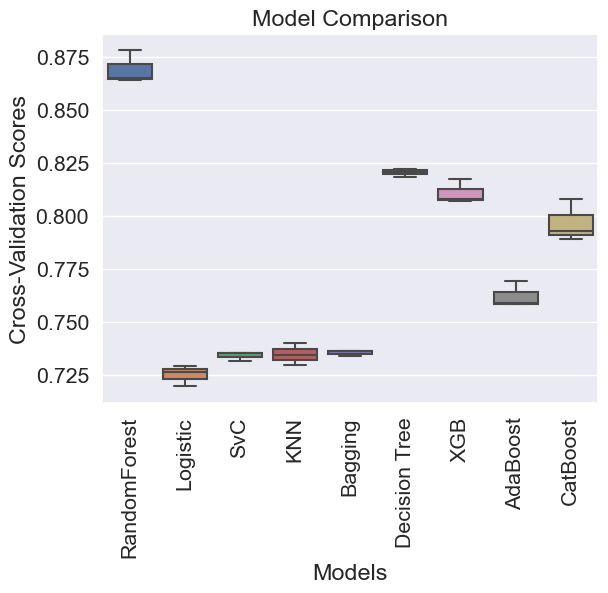

In [116]:
sns.boxplot(data=results)
plt.xticks(ticks=range(len(models)), labels=models.keys(), rotation=90)
plt.ylabel("Cross-Validation Scores")
plt.xlabel("Models")
plt.title("Model Comparison")
# plt.xticklabels(rotation=45)
plt.show()

In [121]:
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {
    'n_estimators': [100],            
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3,6,9,12],     
    'max_features': [3,6,9,12]}
    
    

best_model = GridSearchCV(model, param_grid=param_grid, cv=kf)
best_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 6, 9, 12],
                         'max_features': [3, 6, 9, 12], 'n_estimators': [100]})

In [122]:
best_lr = best_model.best_estimator_
best_params = best_model.best_params_
# coefs = best_model.coef_
print(best_lr, best_params)

RandomForestClassifier(max_depth=12, max_features=12) {'criterion': 'gini', 'max_depth': 12, 'max_features': 12, 'n_estimators': 100}


In [120]:
model = RandomForestClassifier(max_depth=6, max_features=3, n_estimators=100, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_results(calculate_metrics(y_test, y_pred),classifier_id='RandomForestClassifier')

Results for RandomForestClassifier
----
  Accuracy:  0.7616178004403755
  Precision: 0.761643759149468
  Recall:    0.7616183747329426
  F1 score:  0.7616121528686616
  Mislabeled 2057 out of 8629




# Best score so far: 

In [124]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print_results(calculate_metrics(y_test, y_pred),classifier_id='RandomForestClassifier')

Results for RandomForestClassifier
----
  Accuracy:  0.8908332367597636
  Precision: 0.8961496367355806
  Recall:    0.8908399503408826
  F1 score:  0.8904669465187203
  Mislabeled 942 out of 8629


